## Machine Learning Lab-4: Exploratory Data Analysis (100 marks)

In [278]:
# Run this cell to install the needed dependencies

!pip install pycountry

In [376]:
#This dataset contain information of hotel booking, We have performed exploratory data analysis in python to get insight 
#from the data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry as pc
import matplotlib.ticker as mtick

pd.options.display.max_columns = None

### Import and Display the first 5 rows of the dataset (5 marks)

(You can download the dataset from Canvas. Make sure to keep the dataset in the same folder where you store this assignment file, otherwise you may get errors)

Hint: Use read_csv() to read a csv file in python

In [377]:

hotel_bookings=pd.read_csv("hotel_bookings.csv")
hotel_bookings

# Enter your code here



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Data Preprocessing (10 marks)

**Make a new dataframe which is a copy of the dataset so that our original dataset remains unchanged (1 mark)**

In [378]:
## Copy the dataset
df = hotel_bookings.copy()

**(From now on, you will be using the new dataframe which you created in the previous cell for the rest of the assignment)**

**Find the size of the dataframe (1 mark)**

In [379]:
print(df.shape)


(119390, 32)


**Check if our data contains any missing  values (2 marks)**

In [380]:
## Find the missing value, show the total null values for each column and sort it in descending order

df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

We can see that company, agent, country and children contain missing values

In [381]:
## For the missing values in company and agent, just replace them with 0

df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [382]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(hotel_bookings.country.mode().to_string(), inplace=True)


In [383]:
## For missing children value, replace it with rounded mean value

df['children'].fillna(round(hotel_bookings.children.mean()), inplace=True)

**Check if there are any rows with zero guests (No adults, children or babies)** 

In [384]:
df[(df.adults+df.babies+df.children)==0].shape

(180, 32)

In [385]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

**Find the new size of the dataframe after preprocessing (1 mark)**

In [386]:
print(df.shape)

(119210, 32)


**Checking the datatypes of each columns in the dataset (2 marks)**

In [387]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**Convert the datatypes into integers as some are declared floats but uses only integers**

In [388]:
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

**Check the datatypes one more time to see if the conversion has worked or not (2 marks)**

In [389]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Perform Exploratory Data Analysis (45 marks)

**Answer the following questions using the following functions. The answers for these questions are not present in the reference file. You need to do this yourself**

In [390]:
#This function gives the precentage of different values

def get_count(series, limit=None):  
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [391]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

**Question-1 What is the booking ratio between resort hotel and city hotel? (15 marks) (5 marks for the code, 5 marks for the graph and 5 marks for the analysis)**

**Question-2 What is the percentage of booking for each year? (15 marks) (5 marks for the code, 5 marks for the graph and 5 marks for the analysis)**

**Question-3 How many bookings were cancelled? (15 marks) (5 marks for the code, 5 marks for the graph and 5 marks for the analysis)**

Hint: Pass the appropriate dataframe columns to the get_count() function, pass the output of get_count() to plot() function, to generate the plots. Analyze these plots to answer the questions

In [392]:

import warnings
warnings.filterwarnings('ignore')
# Enter your code for question-1 here
x,y = get_count(df_not_canceled['hotel'])
x,y

(array(['City Hotel', 'Resort Hotel'], dtype=object),
 array([61.43632267, 38.56367733]))

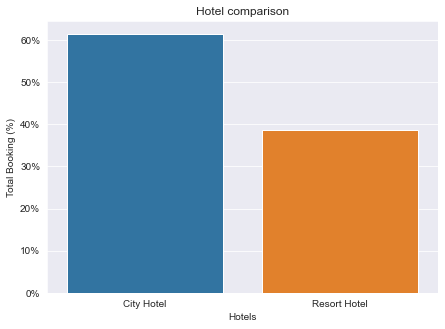

In [393]:


# Enter your analysis here
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

In [394]:


# Enter your code for question-2 here
x,y = get_count(df_not_canceled['arrival_date_year'])
x,y

(array([2016, 2017, 2015]), array([48.39156924, 33.17646745, 18.43196331]))

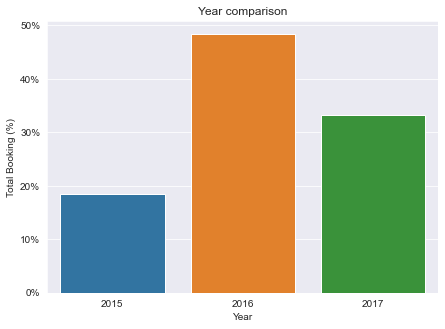

In [395]:


# Enter your analysis here
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')



In [396]:


# Enter your code for question-3 here

x,y = get_count(df['is_canceled'])
x,y


(array([0, 1]), array([62.92341247, 37.07658753]))

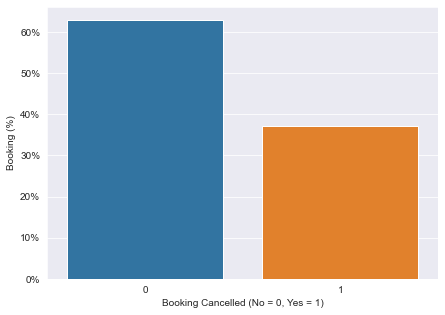

In [397]:


# Enter your analysis here
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

df_not_canceled = df[df['is_canceled'] == 0]



### Feature Selection (20 marks)

**Remove the unwanted features (10 marks)**

Use drop() to drop the unwanted features. You previously used drop() to drop some rows, but now we need to drop some columns. Make sure to keep the correct code to get marks.

The unwanted features in this dataset are:

arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, arrival_date_month, assigned_room_type, reserved_room_type, reservation_status_date, previous_cancellations, previous_bookings_not_canceled, reservation_status

Also pass axis=1

In [398]:
# Enter your code here

df_subset = df.copy()

## Make the new column which contain 1 if guest received the same room which was reserved otherwise 0
df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1


## Make the new column which contain 1 if the guest has cancelled more booking in the past
## than the number of booking he did not cancel, otherwise 0

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1
## Remove the less important features
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled' , 'reservation_status'],axis=1)


**Find the categorical values and remove them as well from the dataset (10 marks)**

In [399]:
# Find the categorical features
## Remove the less important features

categorical_features = list(df_subset.columns[df_subset.dtypes == object])

In [400]:
# Print the categorical features here
categorical_features

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type']

Drop these columns as well since they contain categorical values and may hinder in training and testing the model

In [401]:
## Remove the less important features
df_subset = df_subset.drop(['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'deposit_type',
 'customer_type','Room','net_cancelled'],axis=1)


In [402]:
df_subset

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,0,0,2,0,0,0,3,0,0,0,0.00,0,0
1,0,737,0,0,2,0,0,0,4,0,0,0,0.00,0,0
2,0,7,0,1,1,0,0,0,0,0,0,0,75.00,0,0
3,0,13,0,1,1,0,0,0,0,304,0,0,75.00,0,0
4,0,14,0,2,2,0,0,0,0,240,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,2,0,0,0,0,394,0,0,96.14,0,0
119386,0,102,2,5,3,0,0,0,0,9,0,0,225.43,0,2
119387,0,34,2,5,2,0,0,0,0,9,0,0,157.71,0,4
119388,0,109,2,5,2,0,0,0,0,89,0,0,104.40,0,0


### Create decision tree models for both regression and classification (20 marks)

**Train and test the data. Use 'is_cancelled' as the target. Use training to testing ratio as 3:1 (4 marks)**

In [403]:
# Define X and Y values for the train_test_split here
def data_split(subset, label):
    
    from sklearn.model_selection import train_test_split

    X = subset.drop(label, axis=1)
    Y = subset[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test



x_train, x_test, y_train, y_test = data_split(subset, 'is_canceled')

In [404]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf


clf = train(x_train, y_train)

**Use decision tree model (regression) to test the data (4 marks)**

In [405]:


# Enter your code here
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(random_state=0)
clf.fit(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("Accuracy:", test_score)

Accuracy: 0.1943736012898598


**Predict the value of the 45th record in x_train (4 marks)**

In [406]:


# Enter your code here
prediction = clf.predict(x_train.iloc[45].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[45]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')


Predicted Value 	: 1.0
Actual Value		: 1


**Use decision tree model (classification) to test the data (4 marks)**

In [407]:


# Enter your code here

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("Accuracy:", test_score)

Accuracy: 0.8081065664530417


**Predict the value of the 75th record in x_train (4 marks)**

In [408]:


# Enter your code here
## Getting Prediciton of 10th record of x_train
prediction = clf.predict(x_train.iloc[75].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[75]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')


Predicted Value 	: 1
Actual Value		: 1
